# A) Implement the support vector machine for the given dataset. Draw the decision boundary.

12021.052631578947


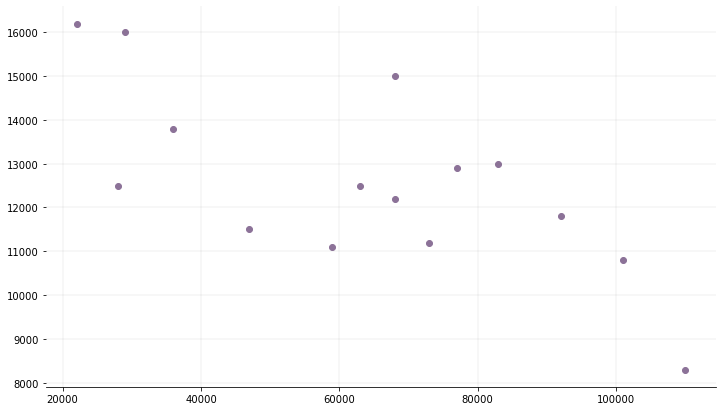

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    
    x = [22000,29000,36000,47000,63000,77000,73000,83000,92000,101000,110000,28000,59000,68000,68000,91000,42000,65000,110000]
    y = [16200,16000,13800,11500,12500,12900,11200,13000,11800,10800,8300,12500,11100,15000,12200,13000,15600,2700,8300]
    target = np.zeros(size)
    
    temp = np.sum(y)
    temp = temp/size
    print(temp)
    
    i=0
    for a in y :
        if a > temp :
            target[i] = 1
        i = i+1
    
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame


size = 19
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']

test_size = int(np.round(size * 0.2, 0))
# Split dataset
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

## Degree = 2

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

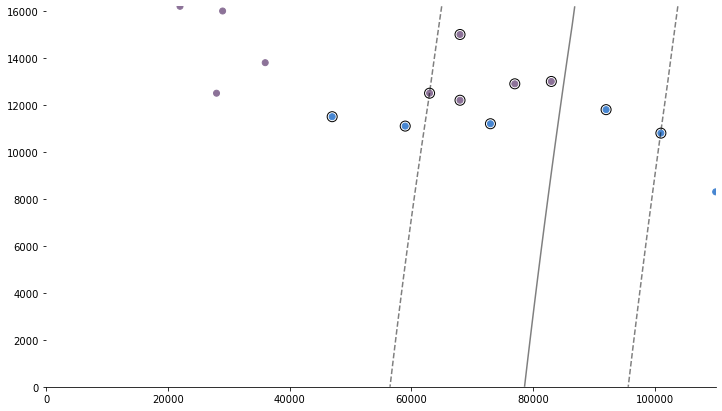

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')

ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Degree = 1

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

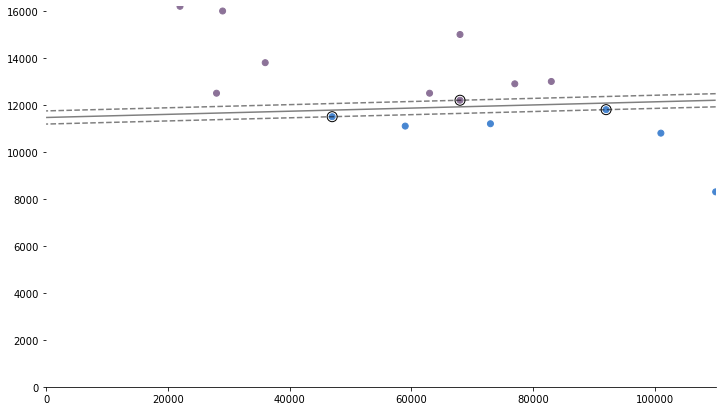

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')

ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# B) Implement linear regression, and calculate b0, b1, SSE, SSR,MSE,SST, Sb1, and F-measure test, p-value test, and confidence interval with alpha= 5%

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score
import statsmodels.api as sm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'y(dependent)')

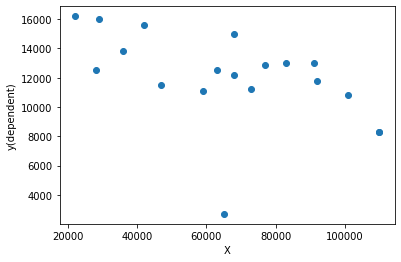

In [8]:
x = np.array([22000,29000,36000,47000,63000,77000,73000,83000,92000,101000,110000,28000,59000,68000,68000,91000,42000,65000,110000])
y = np.array([16200,16000,13800,11500,12500,12900,11200,13000,11800,10800,8300,12500,11100,15000,12200,13000,15600,2700,8300])
n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('y(dependent)')

In [11]:
x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)

Text(0, 0.5, 'y')

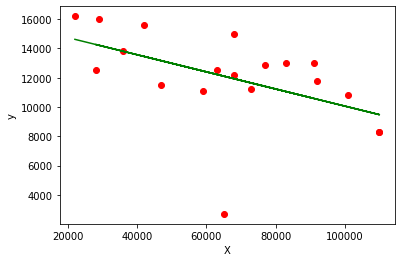

In [12]:
y_pred = regression_model.coef_ * x + regression_model.intercept_
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

In [25]:
import math
from scipy.stats import ttest_ind
class Stats:
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        self.size = len(X) 
        
        self._dft = X.shape[0] - 1   
        
        self._dfe = X.shape[0] - X.shape[1] - 1 
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def sb1(self):
        n = self.size
        avg_x = np.mean(self.data)
        sq_error = (self.data - avg_x) ** 2
        sum = np.sum(sq_error)
        denom = math.sqrt(sum)
        s = math.sqrt(self.sse()/(n - 2))
        return s/denom
    def msm(self):
        dfm = self._dft
        ssr = self.sst() - self.sse()
        msm = ssr / dfm
        return msm

mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
statistics = Stats(x, y, regression_model)  

v1 = x
v2 = y

res = ttest_ind(v1, v2)

msm = statistics.msm()
f_measure = msm / mse

# printing values
print('Following are the statistics -------- ')
print('Slope(b1) = ' ,regression_model.coef_)
print('Intercept(b0) = ', regression_model.intercept_)
print('MSE = ',mse)
print('Root mean squared error = ', rmse)
print('R2 score = ', r2)
sse = statistics.sse()
sst = statistics.sst()
print('SSE(sum of squared errors) = ',sse)
print('SST(total sum of squared errors) = ',sst)
print('SSR(sum of squares due to regression) = ',sst - sse)
print('Sb1(Estimated Standard Deviation of b1) = ',statistics.sb1())
print('pvalue = ',res.pvalue[0])
print('F-measure = ',f_measure)
print('Confidence Interval = [0, {0}]'.format(1-0.05))
print('------- END --------')

Following are the statistics -------- 
Slope(b1) =  [-0.05841732]
Intercept(b0) =  15907.341673486886
MSE =  7007660.037208654
Root mean squared error =  2647.198526217604
R2 score =  0.25713124054962
SSE(sum of squared errors) =  133145540.70696443
SST(total sum of squared errors) =  179231578.94736844
SSR(sum of squares due to regression) =  46086038.24040401
Sb1(Estimated Standard Deviation of b1) =  0.024082179506007488
pvalue =  2.830927312660203e-10
F-measure =  0.36536239546518806
Confidence Interval = [0, 0.95]
------- END --------
